# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKmeans:
    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None,
                 init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def iteration(self):
        old_centroids = self.centroids
        dists = pairwise_distances(self.X, self.centroids, metric=self.metric)
        self.lables = np.argmin(dists, axis=1)
        self.centroids = np.array([self.X[self.lables == i].mean(axis=0)
                                   for i in range(self.k)])
        return np.all(old_centroids == self.centroids)

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        # ...
        self.X = X

        if self.init == "random":
            first = np.random.randint(0, X.shape[0], self.k)
            self.centroids = X[first]

        if self.init == 'Kmeans++':
            self.centroids[0] = X[np.random.randint(0, X.shape[0])]
            for i in range(1, self.k):
                dists = np.min(
                                pairwise_distances(
                                                    X,
                                                    self.centroids[:i],
                                                    self.metric
                                                    ),
                                axis=1
                                ) ** 2
                probs = dists / np.sum(dists)
                self.centroids[i] = X[np.random.choice(range(X.shape[0]),
                                                       p=probs)]

        for i in range(self.max_iter):
                if self.iteration():
                    break
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        dists = pairwise_distances(X, self.centroids,
                                   metric=self.metric)
        return np.argmin(dists, axis=1)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None,
                 init='random', batch_size=10):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def iteration(self):
        M = np.random.permutation(self.X.shape[0])[:self.batch_size]
        dists = pairwise_distances(self.X[M], self.centroids, self.metric)
        self.labels = self.labels.astype(int)
        self.labels[M] = np.argmin(dists, axis=1)
        self.centr_count = np.zeros(self.k)
        for i in M:
            self.centr_count[self.labels[i]] += 1
            temp = self.centr_count[self.labels[i]]
            self.centroids[self.labels[i]] = (
                    self.centroids[self.labels[i]]*(1.0 - 1.0 / temp)
                    + (1.0/temp)*self.X[i]
            )

        return False

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

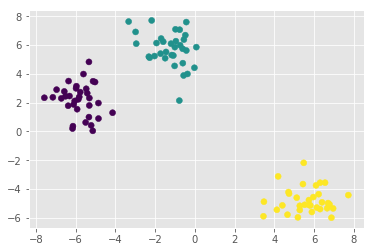

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

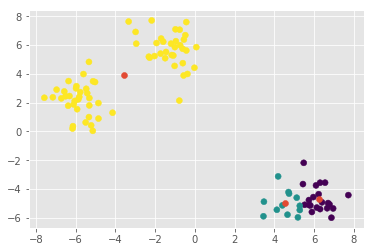

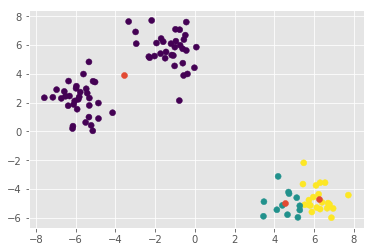

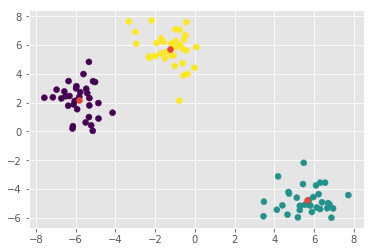

In [6]:
## Работоспособность MyKmeans
for _ in range(3):
    clf = MyKmeans(k=3).fit(X)
    prediction = clf.predict(X)
    
    plt.scatter(X[:,0], X[:, 1], c=prediction)
    plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
    plt.show()

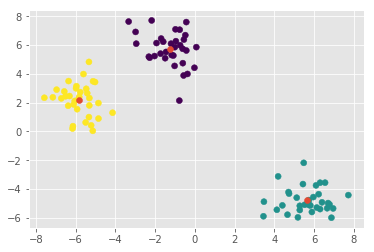

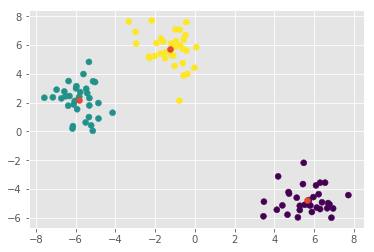

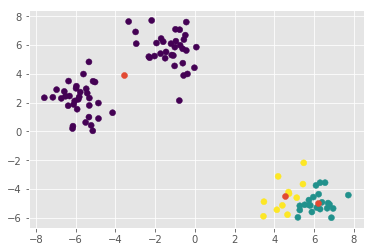

In [7]:
## Работоспособность MyKmeans++
for _ in range(3):
    clf = MyKmeans(k=3, init="Kmeans++").fit(X)
    prediction = clf.predict(X)
    
    plt.scatter(X[:,0], X[:, 1], c=prediction)
    plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
    plt.show()

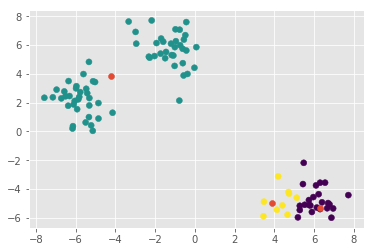

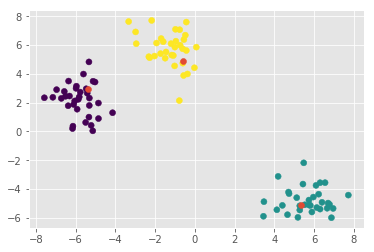

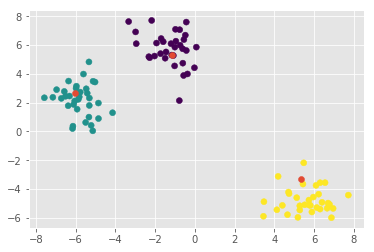

In [8]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
for _ in range(3):
    clf = MiniBatchKMeans(k=3, init="random", batch_size=10).fit(X)
    prediction = clf.predict(X)
    
    plt.scatter(X[:,0], X[:, 1], c=prediction)
    plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
    plt.show()

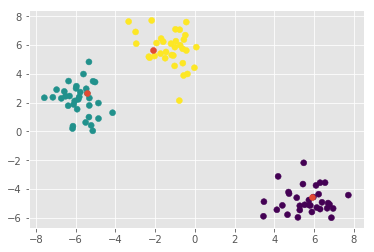

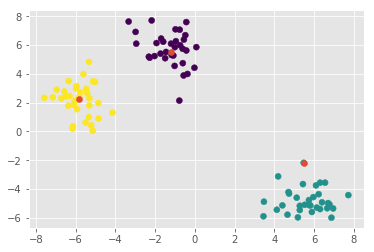

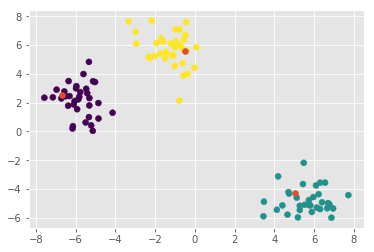

In [9]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
for _ in range(3):
    clf = MiniBatchKMeans(k=3, init="Kmeans++", batch_size=10).fit(X)
    prediction = clf.predict(X)

    plt.scatter(X[:,0], X[:, 1], c=prediction)
    plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
    plt.show()

In [10]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3, max_iter=1000)
%time clf.fit(X)

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 53.4 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
## Время выполнения алгоритма MyKmeans
my_clf = MyKmeans(k=3, init='random')
%time my_clf.fit(X)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 25.9 ms


In [12]:
## Время выполнения алгоритма MyKmeans++
my_clf = MyKmeans(k=3, init='Kmeans++')
%time my_clf.fit(X)

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 7.65 ms


In [13]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, init='random')
%time my_clf.fit(X)

CPU times: user 968 ms, sys: 4 ms, total: 972 ms
Wall time: 1.02 s


In [14]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, init='Kmeans++')
%time my_clf.fit(X)

CPU times: user 1.14 s, sys: 4 ms, total: 1.15 s
Wall time: 1.28 s


# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [15]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [16]:
df = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis='columns')
df[df.columns]=(df[df.columns]-df.mean())/df.std()
M=df.as_matrix()
M

/home/daliya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.33221173, -0.3576914 , -0.24287006, ..., -0.2615258 ,
        -0.22039897, -0.17490468],
       [-0.33221173,  1.06003117, -0.24287006, ..., -0.2615258 ,
        -0.22039897, -0.17490468],
       [-0.33221173,  1.06003117, -0.24287006, ...,  2.02787429,
        -0.22039897, -0.17490468],
       ...,
       [-0.33221173,  1.06003117, -0.24287006, ..., -0.2615258 ,
        -0.22039897, -0.17490468],
       [-0.33221173, -0.3576914 , -0.24287006, ..., -0.2615258 ,
        -0.22039897, -0.17490468],
       [ 2.15316279, -0.3576914 , -0.24287006, ..., -0.2615258 ,
        -0.22039897, -0.17490468]])

In [17]:
def about (clf, N=7) :
    _, counts = np.unique(clf.predict(M), return_counts=True)
    for c_i in range(clf.centroids.shape[0]):
        print(f'{counts[c_i]} students')
        indices = np.argpartition(-clf.centroids[c_i], N)[:N]
        print(list(df.columns[indices]))
        print()

In [18]:
## MyKMeans
clf = MyKmeans(k=9, init='random')
clf.fit(M)
about(clf)

759 students
['rock', 'marching', 'band', 'music', 'swimming', 'god', 'football']

1062 students
['volleyball', 'basketball', 'sports', 'softball', 'football', 'shopping', 'swimming']

4778 students
['cute', 'shopping', 'mall', 'dress', 'dance', 'clothes', 'hot']

901 students
['kissed', 'hair', 'drugs', 'sex', 'drunk', 'die', 'clothes']

20085 students
['tennis', 'jesus', 'soccer', 'blonde', 'death', 'bible', 'drunk']

843 students
['mall', 'hollister', 'abercrombie', 'shopping', 'clothes', 'hair', 'hot']

554 students
['hot', 'cute', 'sexy', 'sex', 'hair', 'drunk', 'dance']

539 students
['baseball', 'football', 'cheerleading', 'rock', 'basketball', 'sports', 'soccer']

479 students
['bible', 'god', 'jesus', 'church', 'death', 'music', 'die']



In [19]:
## MyKMeans++
clf = MyKmeans(k=9, init='Kmeans++')
clf.fit(M)
about(clf)

19949 students
['jesus', 'blonde', 'soccer', 'tennis', 'death', 'drunk', 'marching']

860 students
['abercrombie', 'shopping', 'hollister', 'mall', 'clothes', 'hair', 'hot']

525 students
['jesus', 'music', 'god', 'death', 'die', 'church', 'bible']

564 students
['hot', 'cute', 'sexy', 'sex', 'rock', 'hair', 'drunk']

4714 students
['shopping', 'cute', 'dance', 'dress', 'mall', 'clothes', 'band']

3 students
['sex', 'hair', 'kissed', 'hollister', 'church', 'drugs', 'football']

2444 students
['basketball', 'sports', 'baseball', 'softball', 'football', 'volleyball', 'soccer']

1 students
['rock', 'cute', 'music', 'hair', 'tennis', 'blonde', 'swimming']

940 students
['kissed', 'drugs', 'hair', 'sex', 'drunk', 'die', 'clothes']



In [20]:
## MyKMeans с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=9, init='random',batch_size=10)
clf.fit(M)
about(clf)

3 students
['death', 'kissed', 'dance', 'hair', 'cute', 'mall', 'die']

29871 students
['basketball', 'blonde', 'soccer', 'death', 'hollister', 'jesus', 'dress']

1 students
['jesus', 'god', 'death', 'clothes', 'church', 'bible', 'blonde']

5 students
['sex', 'rock', 'dress', 'death', 'sexy', 'die', 'music']

23 students
['football', 'hollister', 'abercrombie', 'hot', 'volleyball', 'shopping', 'dress']

86 students
['dance', 'marching', 'football', 'band', 'basketball', 'cute', 'blonde']

1 students
['sex', 'kissed', 'drunk', 'hair', 'music', 'band', 'rock']

1 students
['blonde', 'god', 'drunk', 'death', 'die', 'hair', 'sex']

9 students
['music', 'drugs', 'sex', 'dress', 'abercrombie', 'hollister', 'hair']



In [21]:
## MyKMeans++ с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=9, init='Kmeans++', batch_size=10)
clf.fit(M)
about(clf)

29906 students
['hair', 'music', 'death', 'dress', 'shopping', 'drugs', 'rock']

15 students
['jesus', 'kissed', 'drunk', 'die', 'clothes', 'rock', 'god']

11 students
['marching', 'bible', 'band', 'dance', 'die', 'church', 'jesus']

3 students
['hollister', 'hair', 'sex', 'drugs', 'kissed', 'football', 'sports']

13 students
['church', 'hair', 'death', 'jesus', 'shopping', 'abercrombie', 'hollister']

33 students
['die', 'music', 'basketball', 'death', 'dance', 'hair', 'rock']

17 students
['god', 'shopping', 'death', 'music', 'blonde', 'bible', 'marching']

1 students
['blonde', 'god', 'drunk', 'death', 'die', 'hair', 'sex']

1 students
['church', 'dance', 'clothes', 'shopping', 'band', 'rock', 'music']



## Вывод
В реализациях MiniBatchKMeans видно неравномерное деление на кластеры (есть кластеры с менее 10 студентами, а есть с более 20000). Наверное можно добиться лучшего результата подобрав batch_size, но тогда это скажется на скорости работы.  
В реализации MyKmeans лучше интерпретируются кластеры по сравнению с MyKmeans++.